
# **Structural Analysis using Direct Stiffness Method and Elastic Critical Load Analysis**
This notebook provides a comprehensive guide to analyzing **3D frame structures** using:
- **Direct Stiffness Method (DSM)**: To compute nodal displacements, reactions, and internal forces.
- **Elastic Critical Load Analysis (ECLA)**: To determine buckling load factors.

**Note:** User is expected to go through **README** first before working through this notebook.
## **Libraries Used**
- `numpy`: For matrix operations.
- `matplotlib`: For visualization of deformed shapes and internal force distributions.
- `scipy`: For solving eigenvalue problem.


#### Please run this notebook in VSCode. If user is launching it through terminal using Jupyter then remove "src." from the first two lines.
Change these lines:
```python
from src.directstiffnessmethod import direct_stiffness_method as dsm
from src.directstiffnessmethod import elastic_critical_load_solver as ecls
```
to:
```python
from directstiffnessmethod import direct_stiffness_method as dsm
from directstiffnessmethod import elastic_critical_load_solver as ecls
```
If it still does not work then try the other way as well.

In [1]:

from src.directstiffnessmethod import direct_stiffness_method as dsm
from src.directstiffnessmethod import elastic_critical_load_solver as ecls
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set matplotlib display settings
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)


## **1. Define Nodes**
Nodes are defined as a dictionary mapping node IDs to their (x, y, z) coordinates.


In [2]:
# -----------------------
# Defining Nodes
# -----------------------
"""
syntax: 
nodes = {
        node ID: np.array([x, y, z])
    }
Even if the problem is set in 2D, still all 3 coordinates are required.
Few nodes with coordinates [0, 0, 0] are provided. Define all of the nodes using the similar syntax.
"""
nodes = {
    0: np.array([0, 0, 0]),
    1: np.array([-5, 1, 10]),
    2: np.array([-1, 5, 13]),
    3: np.array([-3,7,11]),
    4: np.array([6,9,5])
}



## **2. Define Element Properties**
Each element has properties such as **Young’s modulus (E), Poisson’s ratio (ν), cross-sectional area (A), and moments of inertia (I)**.


In [3]:

# -----------------------
# Defining Element Properties
# -----------------------
"""
Sample code for defining element properties is provided. Edit the properties if user wants to use something different.
User can also copy and paste the following code and rename the variable to define properties for more elements.
"""
section_props_element_1 = {
    "E": 500, "nu": 0.3, "A": np.pi, "Iz": np.pi/4, "Iy": np.pi/4, "J": np.pi/2, "local_z": np.array([0.0, 0.0, 1.0])
}

section_props_element_2 = {
    "E": 1000, "nu": 0.3, "A": 0.5, "Iz": 0.04167, "Iy": 0.01042, "J": 0.02861, "local_z": np.array([1.0, 0.0, 0.0])
}

section_props_element_3 = {
    "E": 210e9, "nu": 0.3, "A": 0.01, "Iz": 8.33e-6, "Iy": 8.33e-6, "J": 1.67e-5, "local_z": np.array([0.0, 0.0, 1.0])
}
# Add more element properties in the space provided below










## **3. Define Elements**
Each element connects two nodes and uses predefined properties.


In [4]:
# -----------------------
# Defining Elements
# -----------------------
"""
Elements can be initialized as:
elements = [
  (nodeID1, nodeID2, section_props_element_1),  # first element
  (nodeID1, nodeID2, section_props_element_2)   # second element 
]
Sample code has been provided for elements with node 0 to node 2 and node 1 to node 2. User can edit the following code and add more elements.
"""
elements = [
    (0, 1, section_props_element_1),
    (1, 2, section_props_element_1),
    (2, 3, section_props_element_1),
    (2, 4, section_props_element_1)
]



## **4. Apply Loads**
Loads are defined as **force (Fx, Fy, Fz)** and **moments (Mx, My, Mz)** applied at specific nodes.


In [5]:
# -----------------------
# Applying Nodal Loads
# -----------------------
"""
For each node where user wants to apply a load, a load vector with 6 inputs of the following form [Fx, Fy, Fz, Mx, My, Mz] can be applied.
A sample is provided. User can add more.
Syntax:
loads = {
  nodeID: np.array([Fx, Fy, Fz, Mx, My, Mz])
}
"""
loads = {
    1: np.array([0.1, -0.05, -0.075, 0, 0, 0]),
    2: np.array([0, 0, 0, 0.5, -0.1, 0.3])
}



## **5. Apply Boundary Conditions**
Define **fixed (True) and free (False) degrees of freedom (DOFs)** for each node.


In [6]:
# -----------------------
# Applying Boundary Conditions
# -----------------------
"""
Boundary conditions at any node are provided in the form of 6 booleans (True = Fixed DOF)
Syntax:
supports = {
  nodeID: [True, True, True, True, True, True], # Completely fixed
  nodeID: [False, True, True, False, False, True] # Motion allowed in x direction and rotation allowed along the x and y axis
}
The 6 components are [displacement in x direction, displacement in y direction, displacement in z direction, rotation about x, rotation about y, rotation about z]
Sample conditions are provided. User can edit them and add more as per the requirements.
"""
supports = {
    0: [False, False, True, False, False, False],
    4: [True, True, True, False, False, False],
    3: [True, True, True, True, True, True]
}



## **6. Solve using Direct Stiffness Method**
Calculate **displacements, reactions, and internal forces**.


In [7]:
# -----------------------
# Initiating the Solver and Printing the Results
# -----------------------
"""
If user hasn't changed the name of the variables then code does not require any further changes or additions from this point.
User can run the script after saving from the terminal using the following command:
"""
solver = dsm.Frame3DSolver(nodes, elements, loads, supports)
displacements, reactions = solver.solve()

disp_matrix = displacements.reshape((-1, 6))
reac_matrix = reactions.reshape((-1, 6))
# Create a dictionary for displacements and reactions
disp_dict = {node: disp_matrix[i] for i, node in enumerate(nodes)}
react_dict = {node: reac_matrix[i] for i, node in enumerate(nodes)}
    
# Output the results
print("Nodal Displacements and Rotations:")
for node, disp in disp_dict.items():
  print(f"Node {node}: [u: {disp[0]:.10f}, v: {disp[1]:.10f}, w: {disp[2]:.10f}, "
        f"rot_x: {disp[3]:.10f}, rot_y: {disp[4]:.10f}, rot_z: {disp[5]:.10f}]")
    
print("\nReaction Forces and Moments at Supports:")
for node, react in react_dict.items():
  # Only display reactions for nodes with boundary conditions
  print(f"Node {node}: [Fx: {react[0]:.10f}, Fy: {react[1]:.10f}, Fz: {react[2]:.10f}, "
        f"Mx: {react[3]:.10f}, My: {react[4]:.10f}, Mz: {react[5]:.10f}]")


Nodal Displacements and Rotations:
Node 0: [u: 0.1629742239, v: 0.0675373057, w: 0.0000000000, rot_x: 0.0038603044, rot_y: -0.0097767200, rot_z: 0.0099770437]
Node 1: [u: 0.0568382275, v: -0.0212726063, w: -0.0442346868, rot_x: 0.0039556640, rot_y: -0.0092999220, rot_z: 0.0099770437]
Node 2: [u: 0.0010444257, v: 0.0010905207, w: 0.0003463178, rot_x: 0.0031355569, rot_y: -0.0040054958, rot_z: 0.0051427325]
Node 3: [u: 0.0000000000, v: 0.0000000000, w: 0.0000000000, rot_x: 0.0000000000, rot_y: 0.0000000000, rot_z: 0.0000000000]
Node 4: [u: 0.0000000000, v: 0.0000000000, w: 0.0000000000, rot_x: -0.0045516627, rot_y: 0.0004901880, rot_z: 0.0006642572]

Reaction Forces and Moments at Supports:
Node 0: [Fx: 0.0000000000, Fy: 0.0000000000, Fz: 0.0066721997, Mx: 0.0000000000, My: 0.0000000000, Mz: -0.0000000000]
Node 1: [Fx: -0.0000000000, Fy: -0.0000000000, Fz: 0.0000000000, Mx: 0.0000000000, My: 0.0000000000, Mz: -0.0000000000]
Node 2: [Fx: 0.0000000000, Fy: 0.0000000000, Fz: -0.0000000000, 

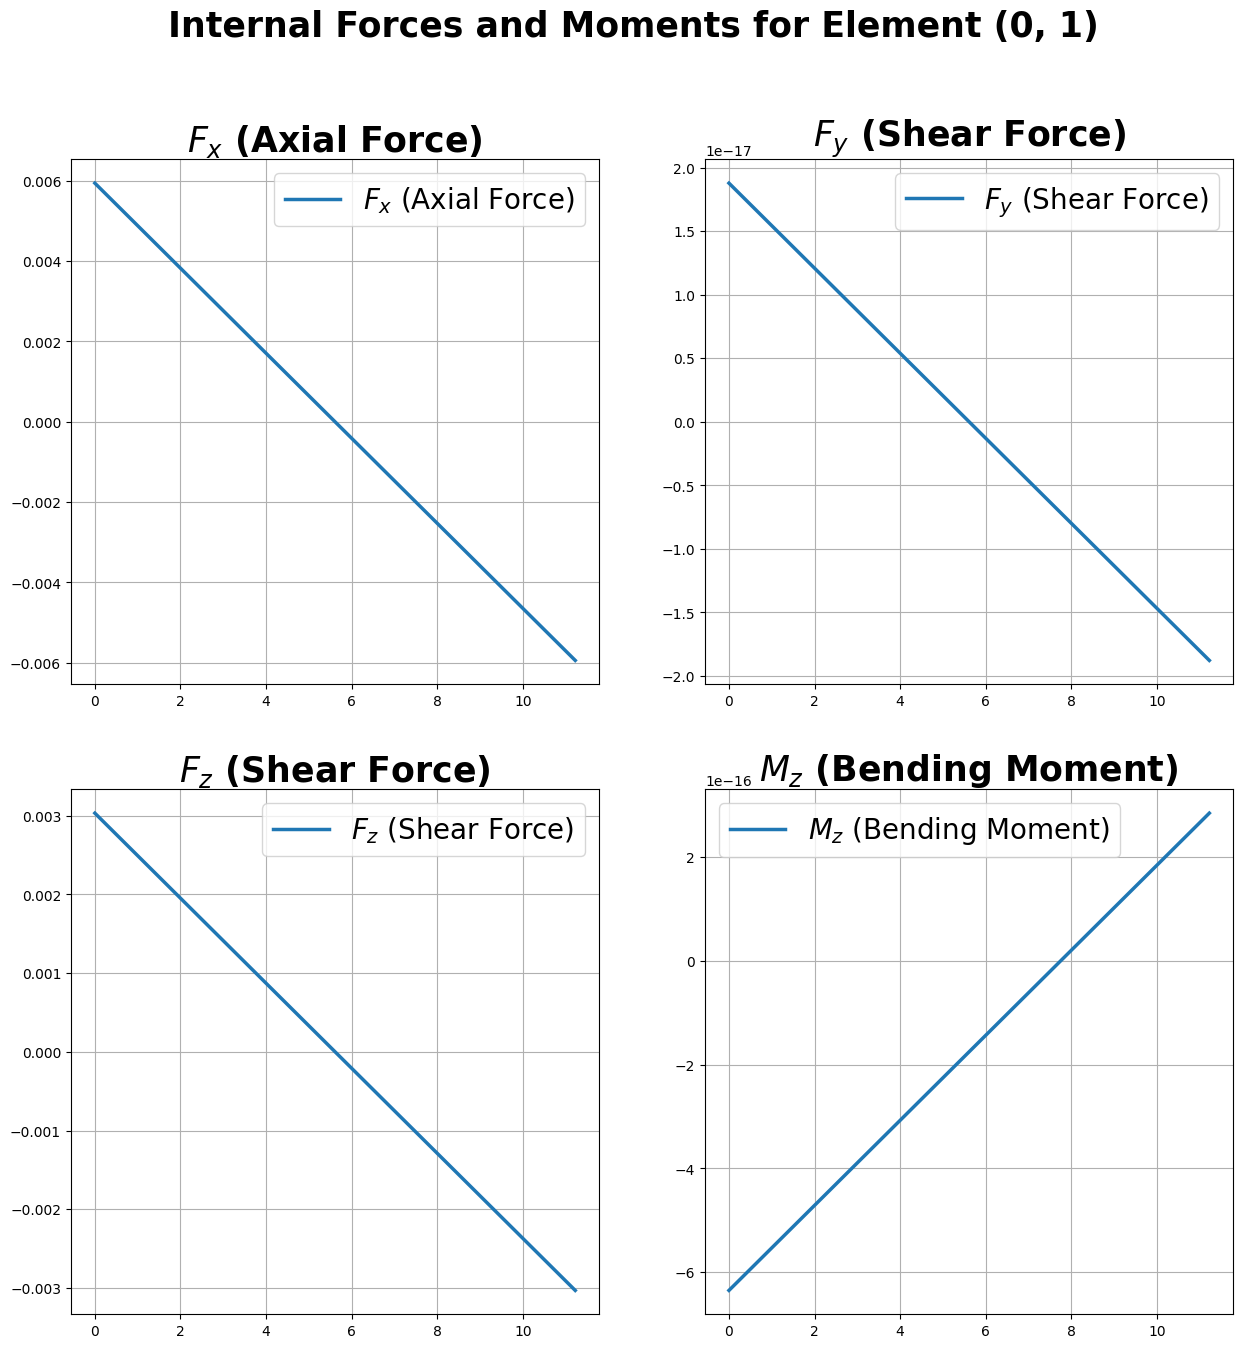

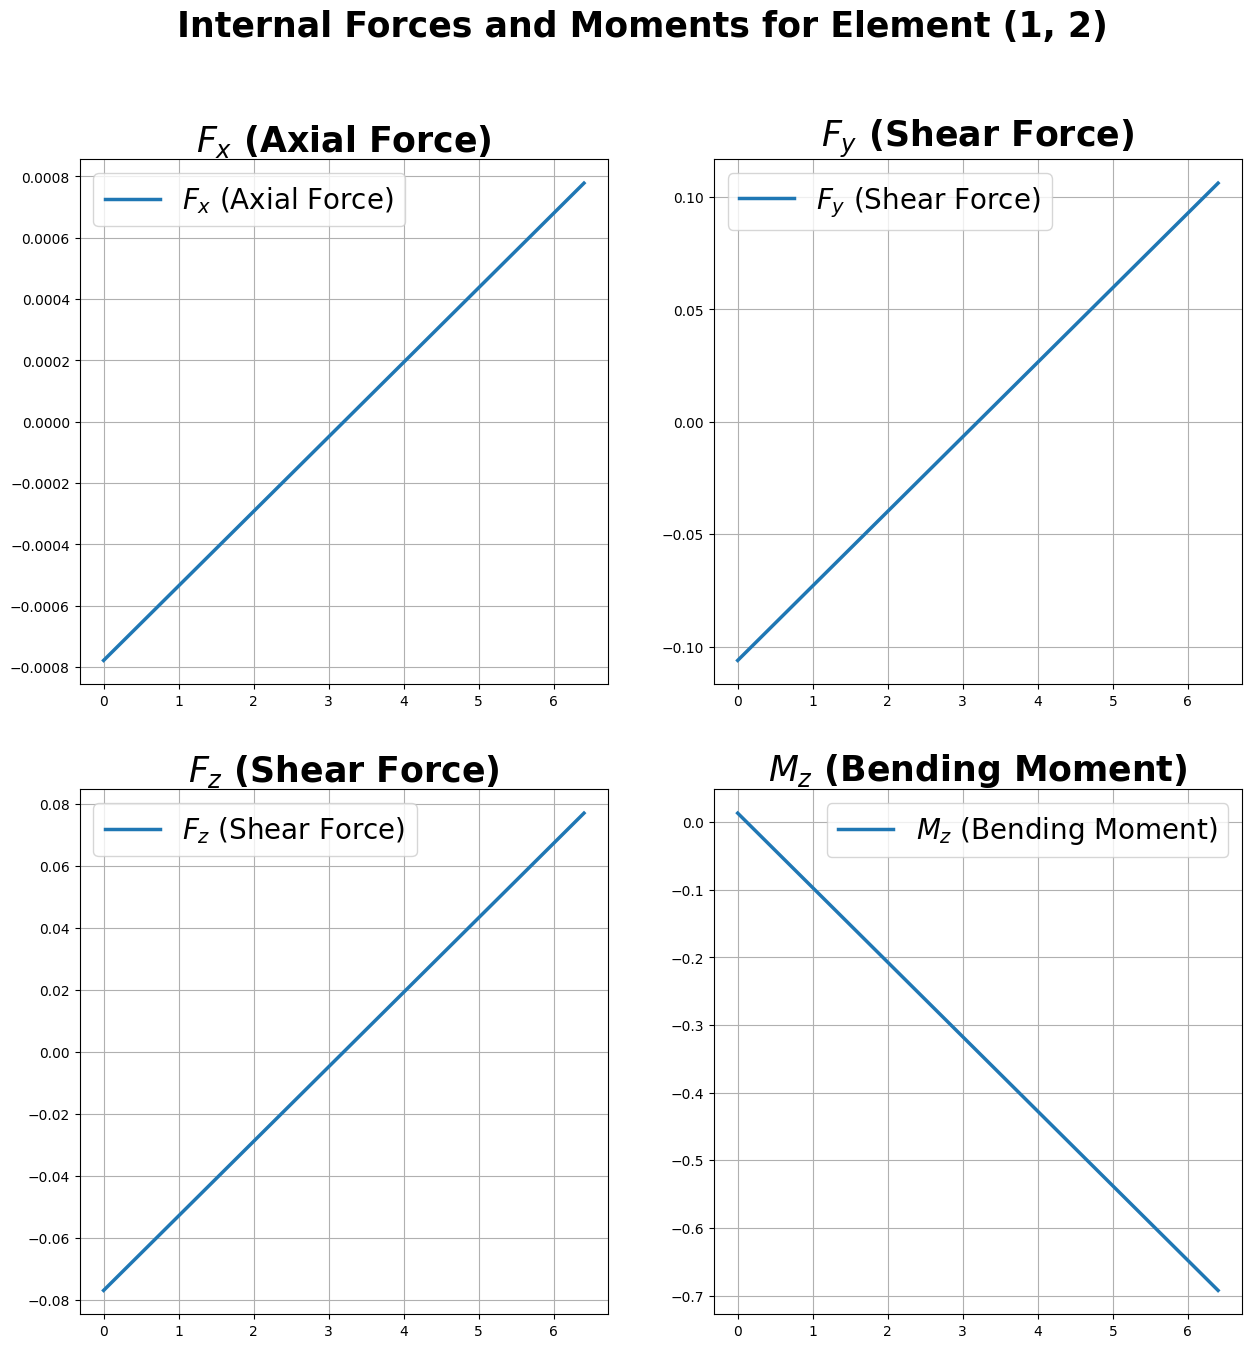

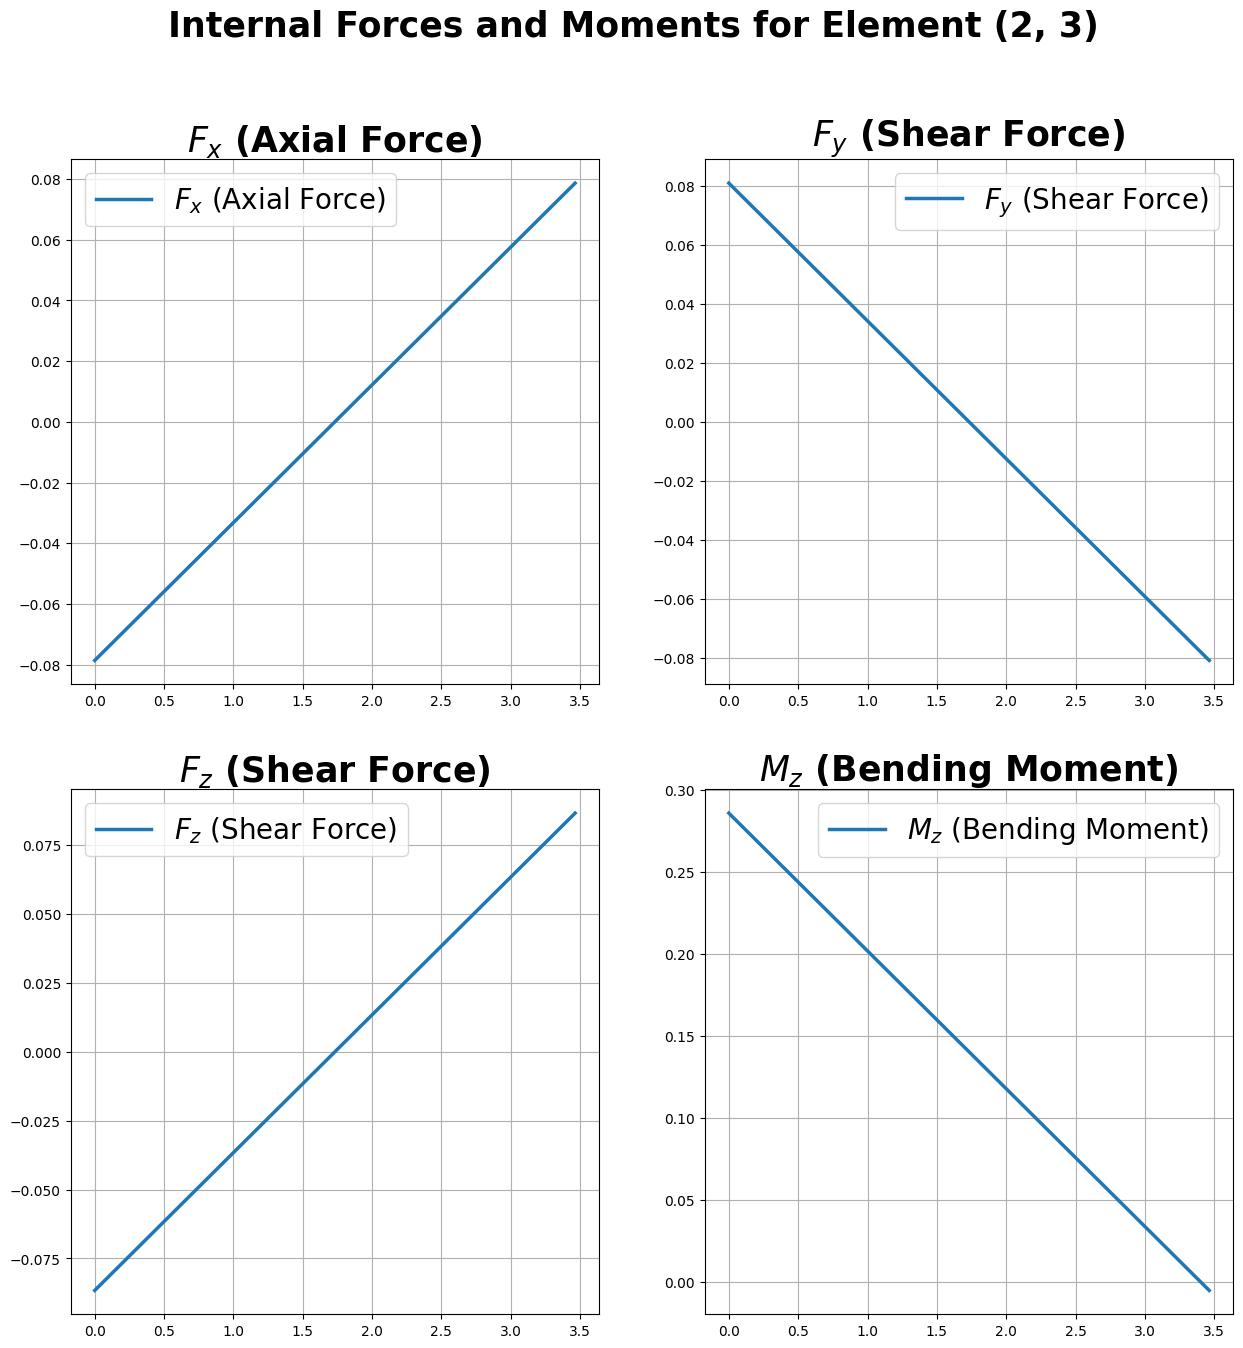

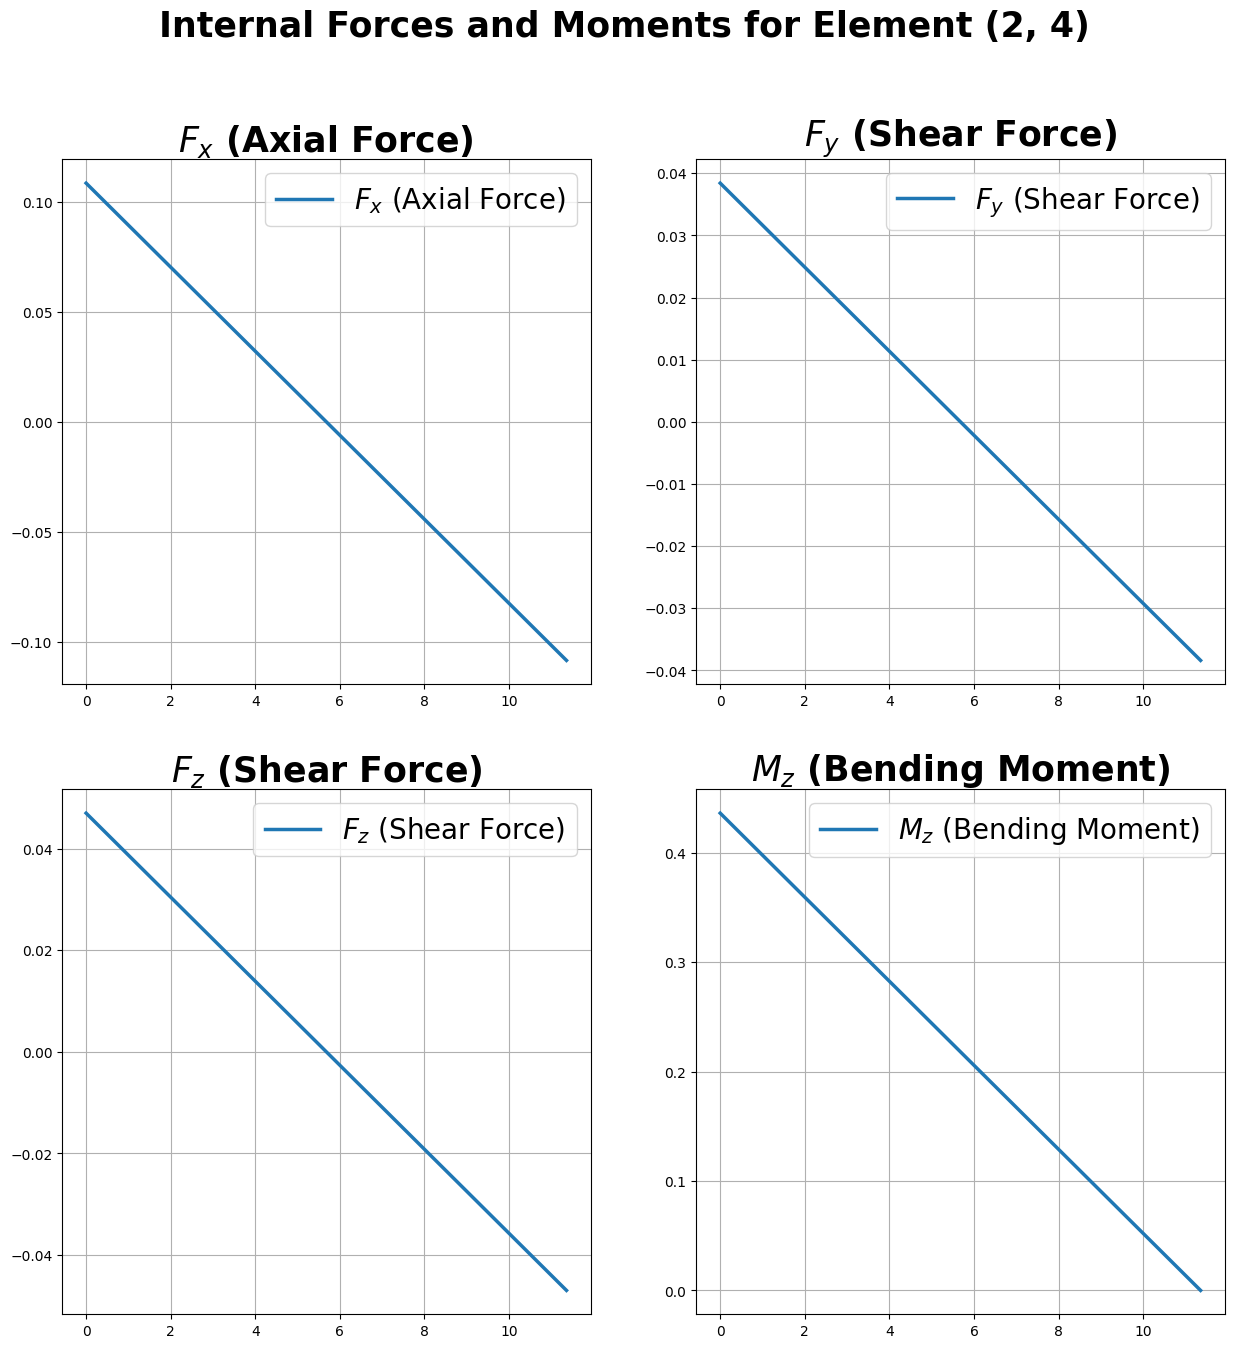

In [8]:
# -----------------------
# Calculating Interal Forces and Plotting
# -----------------------
internal_forces = solver.compute_internal_forces_and_moments(displacements)
solver.plot_internal_forces_and_moments(internal_forces)

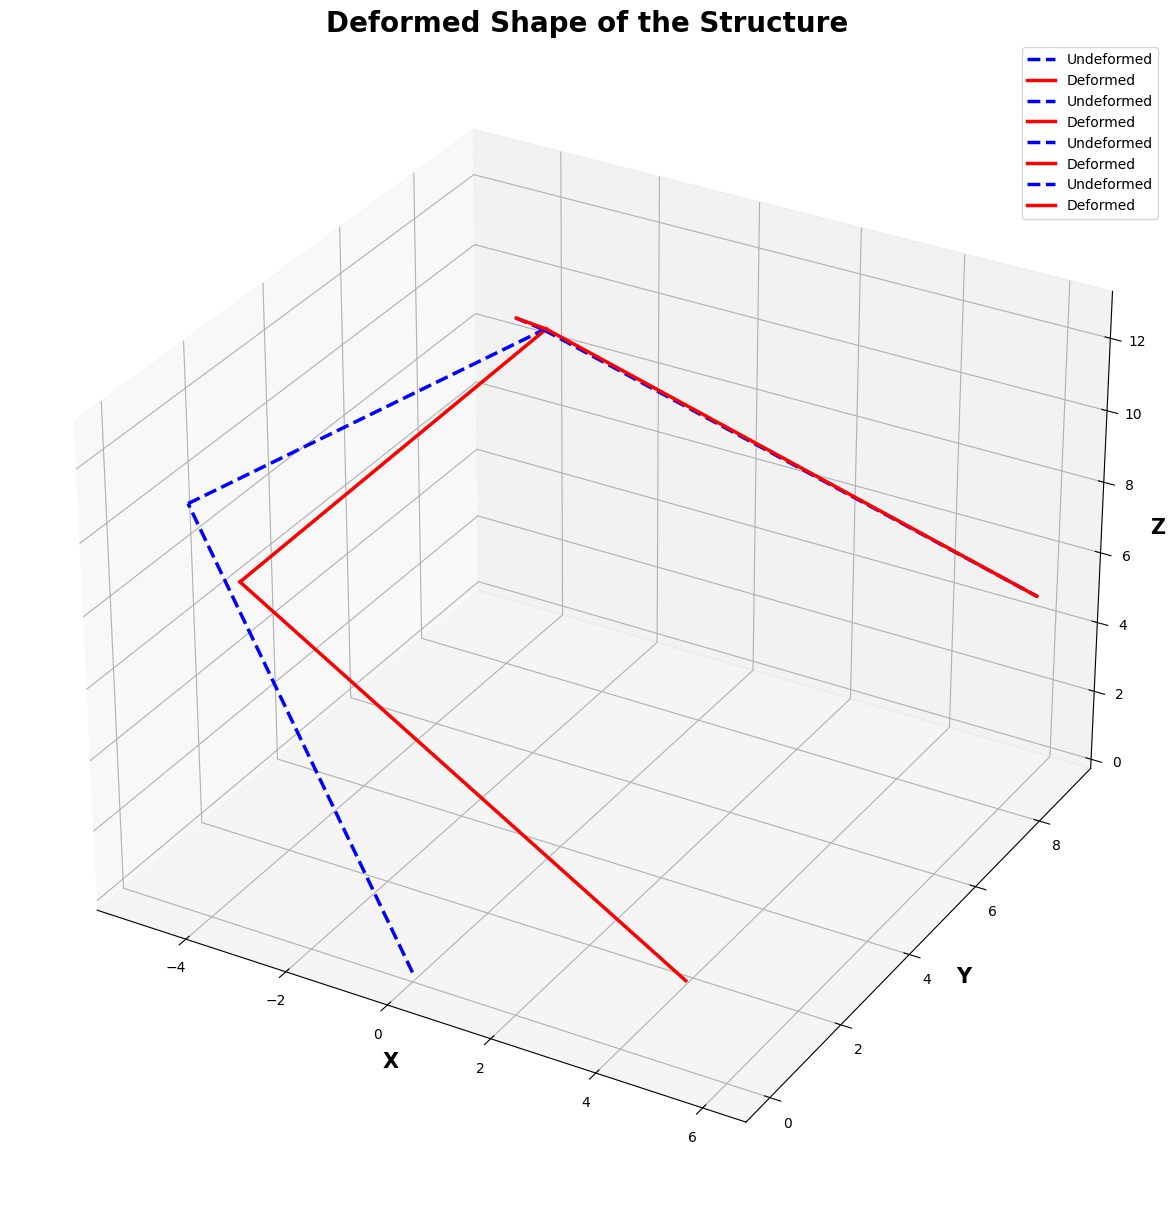

In [9]:
# -----------------------
# Plotting Deformed Shape
# -----------------------
solver.plot_deformed_shape(displacements, scale=25)


# **7. Elastic Critical Load Analysis (ECLA)**
### **Buckling Analysis**
Compute **critical load factors** and plot buckling mode shapes.


Solving for With Interaction Terms
Critical Load Factors: [7.80987901e-01 7.80987901e-01 1.01098666e+01 1.01098666e+01
 1.20830487e+03 3.14159265e+03]
Lowest Critical Load Factor: 0.7809879011060842


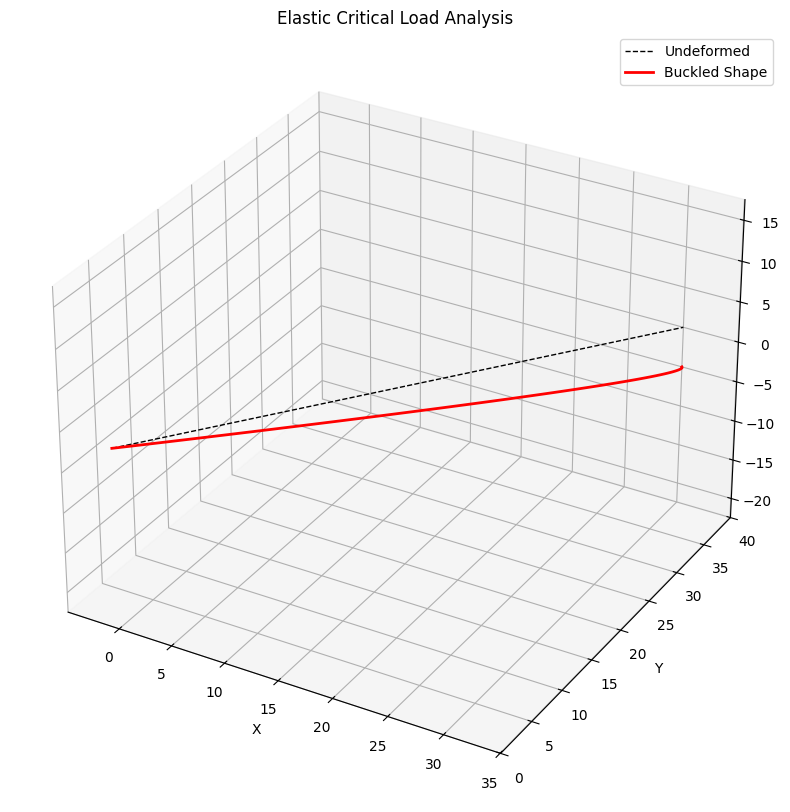

Solving for Without Interaction Terms
Critical Load Factors: [7.80987901e-01 7.80987901e-01 1.01098666e+01 1.01098666e+01
 1.20830487e+03 3.14159265e+03]
Lowest Critical Load Factor: 0.780987901106088


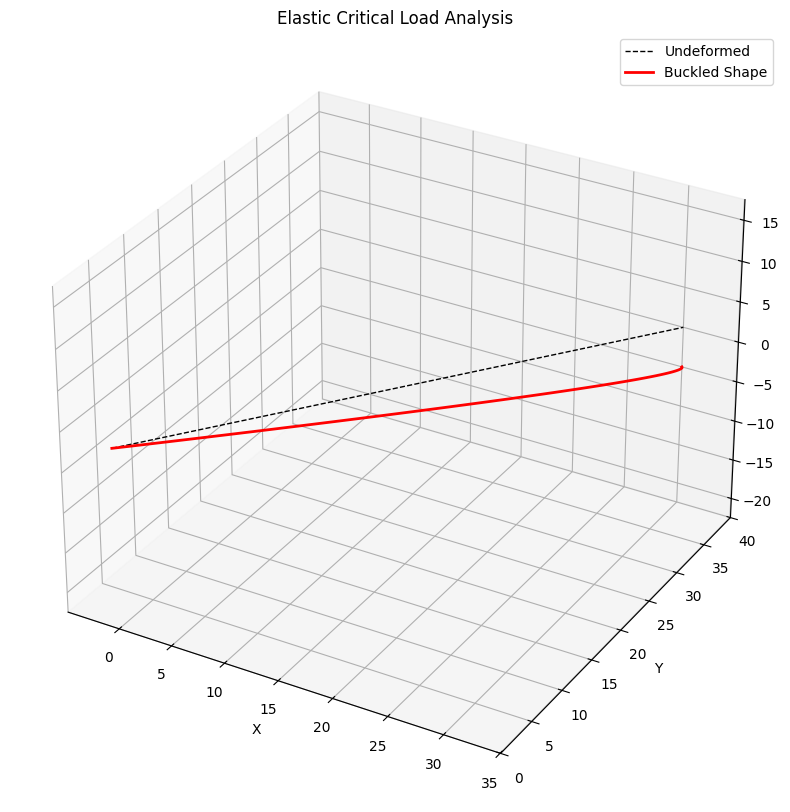

In [ ]:

# Define nodes and elements for buckling analysis
nodes_ecls = {
    0: np.array([0.0, 0.0, 0.0]),
    1: np.array([30.0, 40.0, 0.0])
}
"""
User can input element properties as demonstrated below. If I_rho is not provided then function will take I_rho = J as default.
"""
elements_ecls = [
    (0, 1, {"E": 1000, "nu": 0.3, "A": np.pi, "Iz": np.pi/4, "Iy": np.pi/4, "J": np.pi/2, "I_rho": np.pi/2})
]

loads_ecls = {
    1: np.array([-3/5, -4/5, 0, 0, 0, 0])
}

supports_ecls = {
    0: [True, True, True, True, True, True]
}

frame_solver_ecla = dsm.Frame3DSolver(nodes_ecls, elements_ecls, loads_ecls, supports_ecls)

# Solve for buckling modes WITH and WITHOUT the interaction terms
for use_interaction in [True, False]:
    solver_type = "Without Interaction Terms" if not use_interaction else "With Interaction Terms"
    print(f"Solving for {solver_type}")

    ecl_solver = ecls.ElasticCriticalLoadSolver(frame_solver_ecla, use_interaction_terms=use_interaction)
    eigenvalues, eigenvectors = ecl_solver.solve_eigenvalue_problem()

    mode_shape = eigenvectors[:, 0]

    # Plot the first buckling mode using Hermite shape functions
    print("Critical Load Factors:", eigenvalues)
    print(f"Lowest Critical Load Factor: {np.min(eigenvalues)}")
    ecls.plot_buckling_mode(ecl_solver.frame_solver, mode_shape, scale_factor=5)